<a href="https://colab.research.google.com/github/karandeprathama/DA/blob/main/DoctorVisits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("/content/DoctorVisits - DA.csv")
data.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


<Axes: >

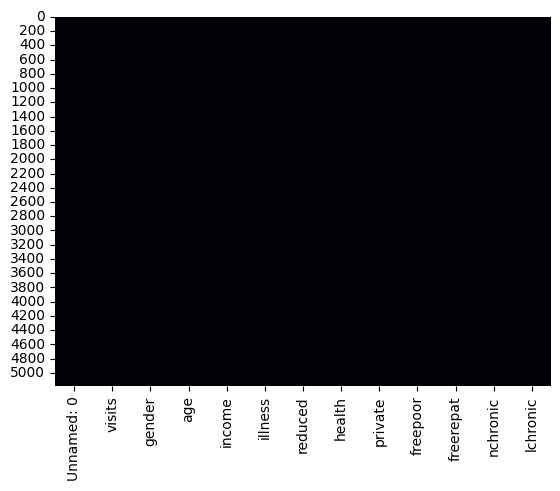

In [12]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

In [13]:
data.describe()

,Unnamed: 0,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,2595.500000,0.301734,0.406385,0.583160,1.431985,0.861850,1.217534
std,1498.368279,0.798134,0.204782,0.368907,1.384152,2.887628,2.124266
min,1.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000
25%,1298.250000,0.000000,0.220000,0.250000,0.000000,0.000000,0.000000
50%,2595.500000,0.000000,0.320000,0.550000,1.000000,0.000000,0.000000
75%,3892.750000,0.000000,0.620000,0.900000,2.000000,0.000000,2.000000
max,5190.000000,9.000000,0.720000,1.500000,5.000000,14.000000,12.000000


In [14]:
data.isna().sum()

Unnamed: 0    0
visits        0
gender        0
age           0
income        0
illness       0
reduced       0
health        0
private       0
freepoor      0
freerepat     0
nchronic      0
lchronic      0
dtype: int64

In [15]:
cols = data.columns[:-1]
cols

Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic'],
      dtype='object')

In [19]:
numeric_columns = ['age', 'illness', 'reduced','health']
categorical_columns = ['gender',  'private', 'freepoor', 'freerepat', 'nchronic','lchronic']

<ipython-input-23-36d42bc4e110>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=num_col, hue='illness', data=data, multiple='stack', ax=ax[i,0])


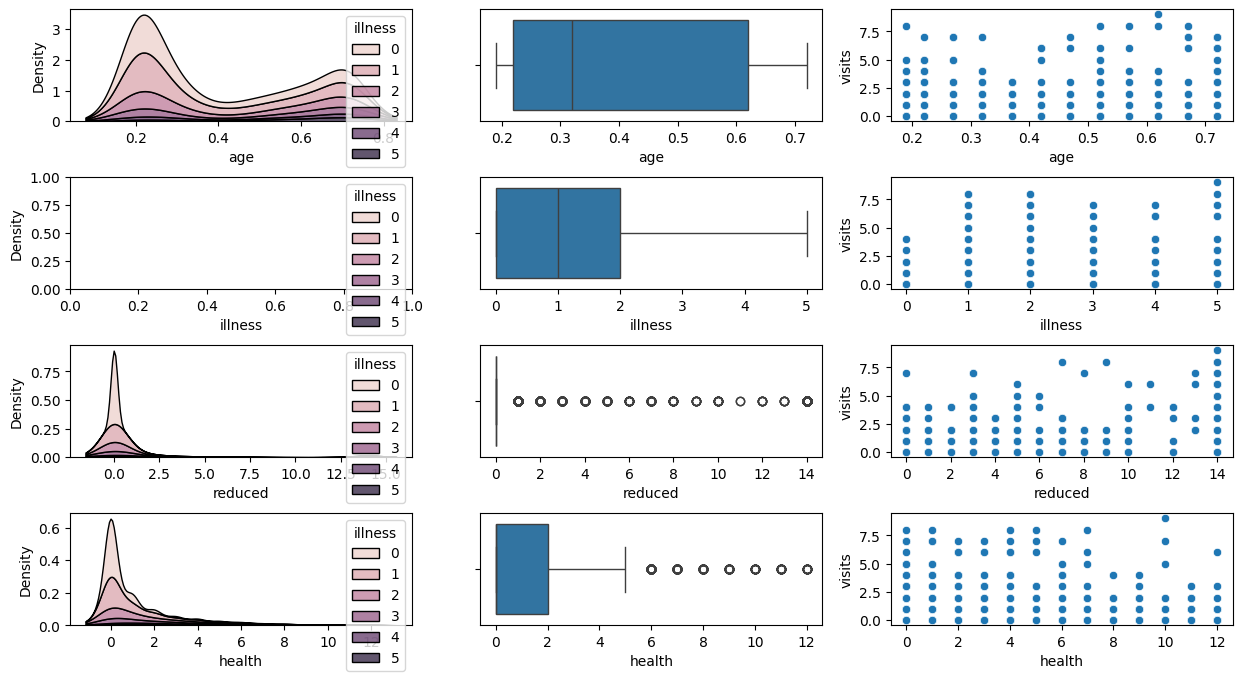

In [23]:
i = 0
fig, ax = plt.subplots(4, 3, figsize=(15, 8))
plt.subplots_adjust(hspace = 0.5)
for num_col in numeric_columns :
    sns.kdeplot(x=num_col, hue='illness', data=data, multiple='stack', ax=ax[i,0])
    sns.boxplot(x=num_col, data=data, ax=ax[i, 1])
    sns.scatterplot(x=num_col, y='visits', data=data, ax=ax[i, 2])
    i+=1
plt.show()

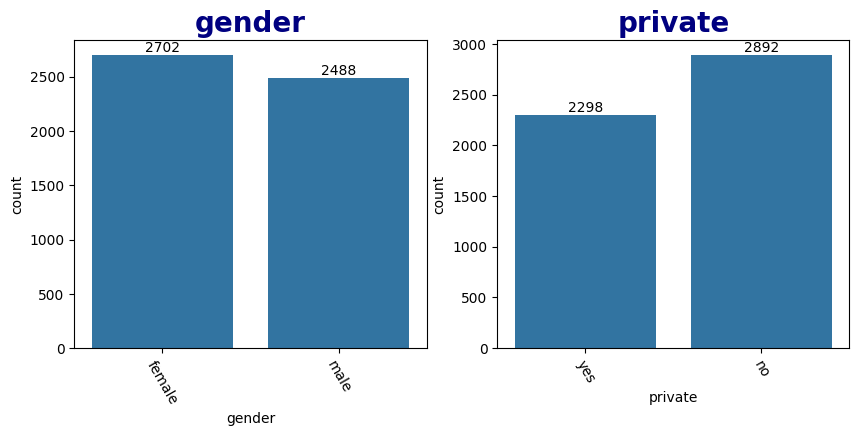

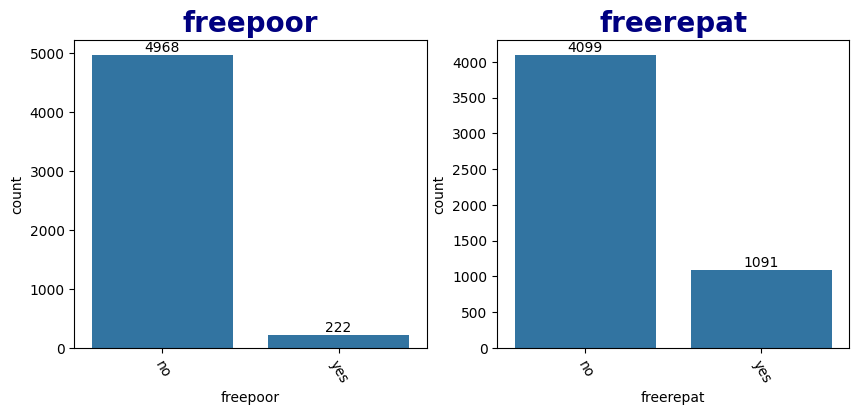

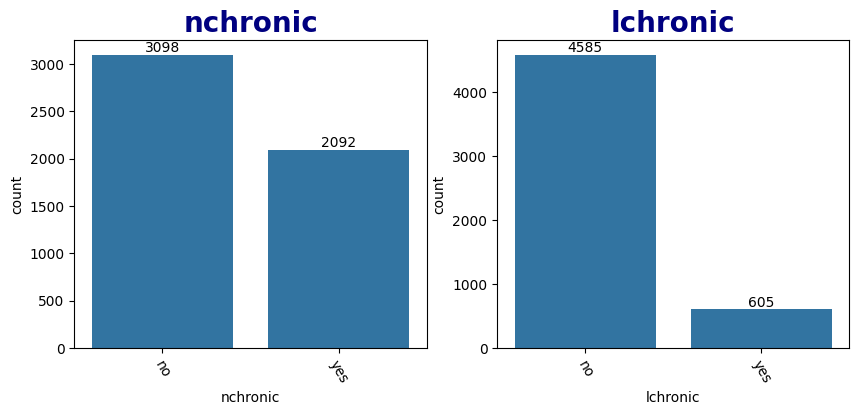

In [29]:
i=0
while i<5 :

    # Left AX
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1

    # Right AX
    plt.subplot(1, 2, 2)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    plt.show()